In [1]:
# Step 1: Import required libraries to script

import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Step 2: Load datasets

movie_basics = pd.read_csv("Movie_basics.tsv"
                           , sep= "\t")

In [7]:
movie_basics.shape

(6486662, 9)

In [8]:
movie_basics.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')

In [11]:
movie_basics.head()

tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

   isAdult startYear endYear runtimeMinutes                    genres  
0        0      1894      \N              1         Documentary,Short  
1        0      1892      \N              5           Animation,Short  
2        0      1892      \N              4  Animation,Comedy,Romance  
3        0      1892      \N             \N           Animation,Short  
4        0      1893      \N              1              Comedy,Short

In [12]:
movie_ratings = pd.read_csv("Movie_ratings.tsv"
                            , sep="\t")

In [13]:
movie_ratings.shape

(1747889, 3)

In [14]:
movie_ratings.columns

Index(['tconst', 'averageRating', 'numVotes'], dtype='object')

In [15]:
movie_ratings.head()

tconst  averageRating  numVotes
0  tt0000001            5.6      1576
1  tt0000001            5.6      1576
2  tt0000002            6.1       189
3  tt0000002            6.1       189
4  tt0000003            6.5      1239

In [16]:
movie_ammount = pd.read_csv("Movie_finance_data.csv")

In [17]:
movie_ammount.shape

(10866, 3)

In [18]:
movie_ammount.columns

Index(['popularity', 'budget', 'revenue'], dtype='object')

In [19]:
movie_ammount.head()

popularity     budget     revenue
0   32.985763  150000000  1513528810
1   28.419936  150000000   378436354
2   13.112507  110000000   295238201
3   11.173104  200000000  2068178225
4    9.335014  190000000  1506249360

In [20]:
# Step 3: Cleaning Data

# Check & drop any duplicate values 
# Check for null/missing values & drop column if it's more than 40%
# Drop the columns which are not needed for Analysis
# Add one more column 'Profit'

# Find & Drop deplicates values
movie_basics.drop_duplicates(inplace = True)

In [21]:
movie_basics.shape

(6486662, 9)

In [22]:
# There is no deplicates as previous shape of movie_basic is alos same as after dropping duplicates (6486662, 9)

In [25]:
movie_ratings.drop_duplicates(inplace = True)

In [26]:
movie_ammount.drop_duplicates(inplace = True)

In [27]:
movie_ammount.shape

(10844, 3)

In [28]:
# Detect the Null values/ Missing values

In [30]:
movie_basics.isnull().sum()

tconst             0
titleType          0
primaryTitle      10
originalTitle     10
isAdult            0
startYear          0
endYear            0
runtimeMinutes     0
genres            11
dtype: int64

In [31]:
movie_ratings.isnull().sum()

tconst           0
averageRating    0
numVotes         0
dtype: int64

In [32]:
movie_ammount.isnull().sum()

popularity    0
budget        0
revenue       0
dtype: int64

In [33]:
# As no null values present in 2 datasets & very less in dataset 1 will continue else we need to remove thet null values 
# with mean/median

In [34]:
# Drop unwanted columns from dateframe

In [35]:
# From movie_basics dataset we will need only 'originalTitle', 'startYear', 'runtimeMinutes', 'genres' columns for analysis 
# & hence we will drop rest of the columns from dataset. 
mv1 = movie_basics.drop(['tconst','titleType' ,'primaryTitle','isAdult','endYear'], axis =1)

In [36]:
mv1.columns

Index(['originalTitle', 'startYear', 'runtimeMinutes', 'genres'], dtype='object')

In [37]:
# From movie_ratings dataframe will drop column 'tconst'
mv2 = movie_ratings.drop(['tconst'],axis=1)

In [38]:
mv2.columns

Index(['averageRating', 'numVotes'], dtype='object')

In [39]:
# & Last will join all datasets together to make one dataset
md1 = mv1.join(mv2)

In [41]:
md = md1.join(movie_ammount) # Now md i.e moviedata is our final datframe which will be using for analysis 

In [42]:
md.columns

Index(['originalTitle', 'startYear', 'runtimeMinutes', 'genres',
       'averageRating', 'numVotes', 'popularity', 'budget', 'revenue'],
      dtype='object')

In [43]:
# As our dataset does not have Profit column which will give the profit, will create a new data field Profit & add it to md
md ['profit'] = md['revenue'] - md['budget']

In [44]:
md.columns

Index(['originalTitle', 'startYear', 'runtimeMinutes', 'genres',
       'averageRating', 'numVotes', 'popularity', 'budget', 'revenue',
       'profit'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002802A2E41C8>,
      dtype=object)

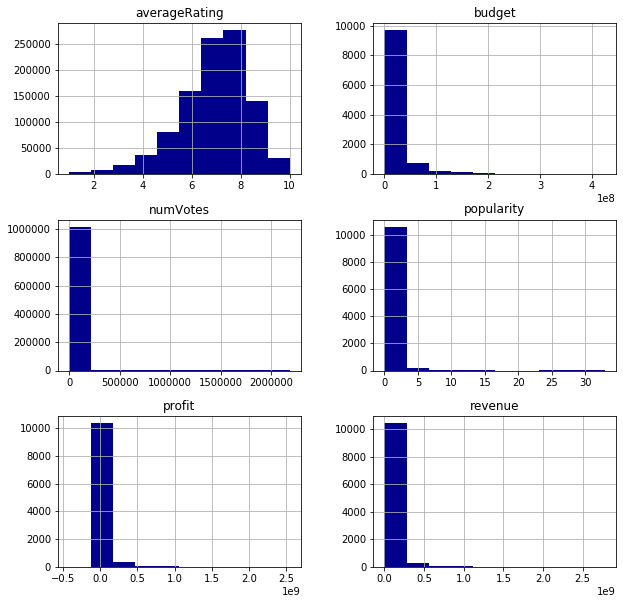

In [45]:
# Step 4: Exploratory Data Analysis (Insigths of data)

# a.Distribution
# b.Descriptive Analysis
# Business questions & hypothesis

md.hist(color='DarkBlue',figsize= (10,10))

In [49]:
#Find movies with highest popularity
md.nlargest(3, 'popularity')

originalTitle startYear runtimeMinutes             genres  \
0                    Carmencita      1894              1  Documentary,Short   
1        Le clown et ses chiens      1892              5    Animation,Short   
629  The Anarchist's Sweetheart      1908             \N        Drama,Short   

     averageRating  numVotes  popularity       budget       revenue  \
0              5.6    1576.0   32.985763  150000000.0  1.513529e+09   
1              NaN       NaN   28.419936  150000000.0  3.784364e+08   
629            NaN       NaN   24.949134  165000000.0  6.217525e+08   

           profit  
0    1.363529e+09  
1    2.284364e+08  
629  4.567525e+08

In [50]:
#Find movies with highest Budget
md.nlargest(5, 'budget')

originalTitle startYear  \
2244                                 In the North Woods      1912   
3375                                         The Stigma      1913   
7387         Trägen vinner eller Calle som skådespelare      1916   
14                                  Autour d'une cabine      1894   
6570  The Fable of the Fearsome Feud Between the Fir...      1916   

     runtimeMinutes           genres  averageRating  numVotes  popularity  \
2244             \N      Drama,Short            6.9    1121.0    0.250540   
3375             \N      Drama,Short            6.7     147.0    4.955130   
7387             \N            Short            7.0      16.0    4.965391   
14                2  Animation,Short            6.9    5640.0    5.944927   
6570             \N     Comedy,Short            NaN       NaN    1.957331   

           budget       revenue        profit  
2244  425000000.0  1.108757e+07 -4.139124e+08  
3375  380000000.0  1.021683e+09  6.416830e+08  
7387  300000000.0  9.610000e+08  6.610000e+08  
14    280000000.0  1.405036e+09  1.125036e+09  
6570  270000000.0  3.910812e+08  1.210812e+08

In [52]:
#Find movies with highest profit
md.nlargest(5, 'profit')

originalTitle startYear runtimeMinutes             genres  \
1386              Sisters      1910             \N        Drama,Short   
3             Un bon bock      1892             \N    Animation,Short   
5231   Faces in the Night      1915             \N        Drama,Short   
4361  När svärmor regerar      1914             20              Short   
0              Carmencita      1894              1  Documentary,Short   

      averageRating  numVotes  popularity       budget       revenue  \
1386            NaN       NaN    9.432768  237000000.0  2.781506e+09   
3               NaN       NaN   11.173104  200000000.0  2.068178e+09   
5231            NaN       NaN    4.355219  200000000.0  1.845034e+09   
4361            5.6     127.0    7.637767  220000000.0  1.519558e+09   
0               5.6    1576.0   32.985763  150000000.0  1.513529e+09   

            profit  
1386  2.544506e+09  
3     1.868178e+09  
5231  1.645034e+09  
4361  1.299558e+09  
0     1.363529e+09

In [53]:
# Get movies made per year

movie_per_year = md.groupby('startYear').originalTitle.nunique()

In [55]:
movie_per_year.head(100)

startYear
1892      3
1893      1
1894      6
1895     19
1896    104
       ... 
1990      3
1993      1
1995      2
2001      1
2004      1
Name: originalTitle, Length: 100, dtype: int64

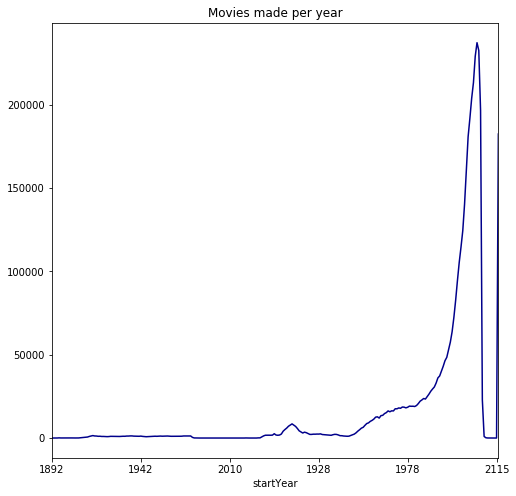

In [56]:
# Plot data
movie_per_year.plot.line(title = 'Movies made per year',color='DarkBlue',figsize=(8, 8))

In [63]:
# The count of movies increased after 1978 exponentially. 

In [64]:
# Get mean of variables grouped by year (new data frame) & see changes
md_year_mean = md.groupby('startYear').mean()

In [66]:
md_year_mean.head()

averageRating     numVotes  popularity        budget       revenue  \
startYear                                                                       
1892            6.100000   189.000000   17.568516  1.533333e+08  9.139509e+08   
1893            6.500000  1239.000000    9.335014  1.900000e+08  1.506249e+09   
1894            6.000000  1884.200000   11.961219  1.503333e+08  9.407050e+08   
1895            5.566667   928.833333    5.117884  8.968421e+07  3.599715e+08   
1896            4.732787   299.278689    2.114236  3.187721e+07  7.680653e+07   

                 profit  
startYear                
1892       7.606176e+08  
1893       1.316249e+09  
1894       7.903716e+08  
1895       2.702873e+08  
1896       4.492931e+07

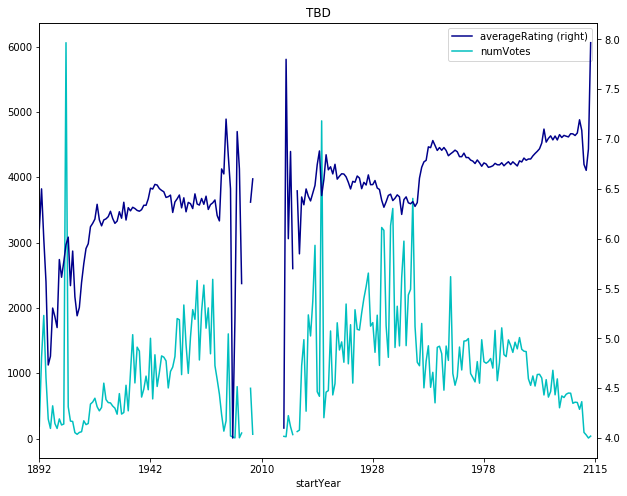

In [70]:
# Graph for vote_avg & vote_count
md_year_mean[['averageRating', 'numVotes']].plot(title = 'TBD',color=('DarkBlue','c')
,figsize=(10, 8),secondary_y=['averageRating'])

In [71]:
# get unique geners

md['genres'].unique()

array(['Documentary,Short', 'Animation,Short', 'Animation,Comedy,Romance',
       ..., 'Musical,Reality-TV,Talk-Show', 'Animation,Short,Talk-Show',
       'Comedy,Mystery,Talk-Show'], dtype=object)

In [75]:
len(md['genres'].unique())

2243

In [85]:
# Business Questions
# Q1. Which genres are the most common (number of movies made)?
qone = md.groupby(['genres']).originalTitle.nunique()

In [86]:
qone.head()

genres
Action                    25451
Action,Adult                 78
Action,Adult,Adventure       52
Action,Adult,Animation       39
Action,Adult,Comedy          35
Name: originalTitle, dtype: int64

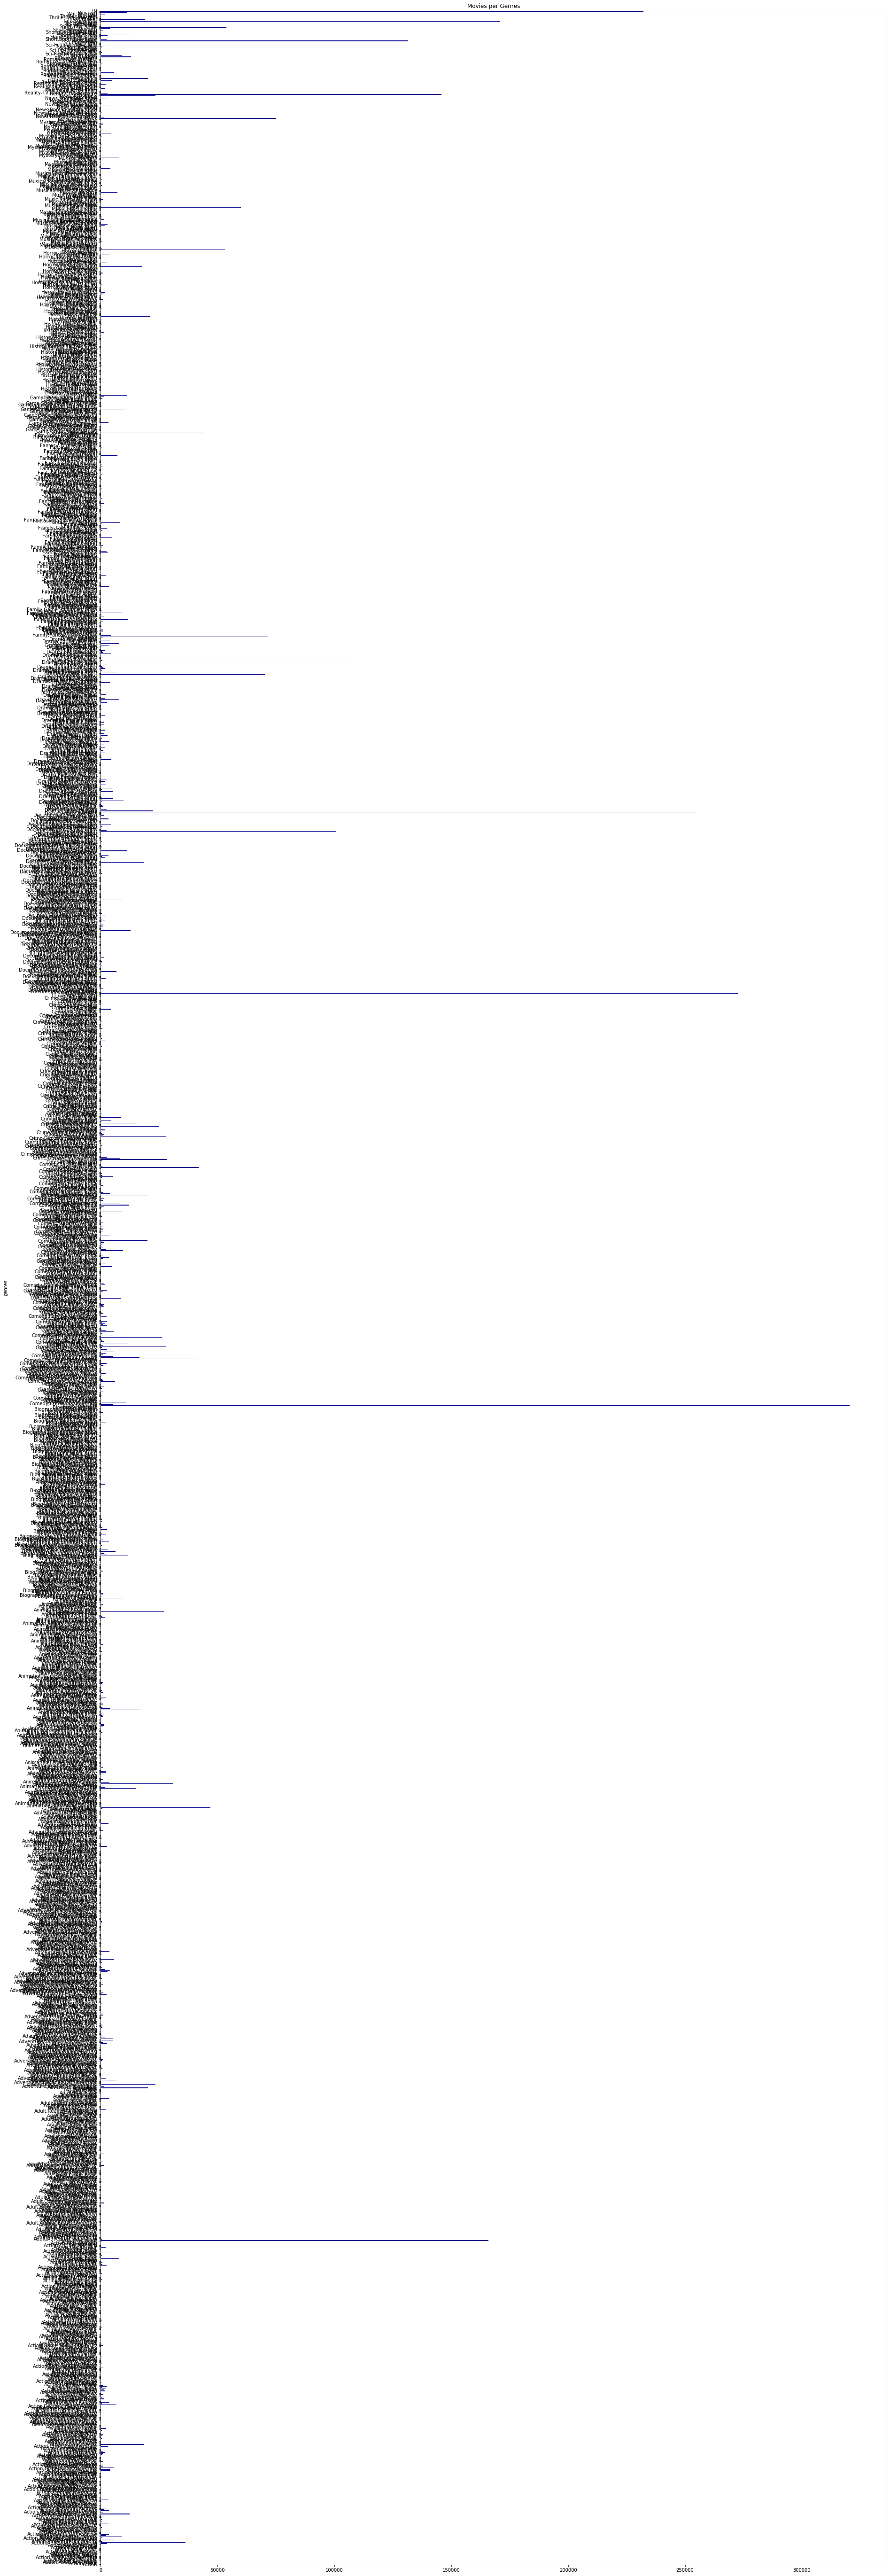

In [97]:
# plot bar graph for same
qone.plot.barh(title = 'Movies per Genres',color ='darkBlue', figsize = (30,100 ))

In [94]:
### Q2. Which genres have high avg. budget and revenue?
# Now we will group data i.e (profit,budget,revenue) by genre and get mean for each genre and 
# each variable
md_genre_mean = md.groupby(['genres']).mean()

In [95]:
md_genre_mean.sort_values('budget' ,ascending=True, inplace = True)

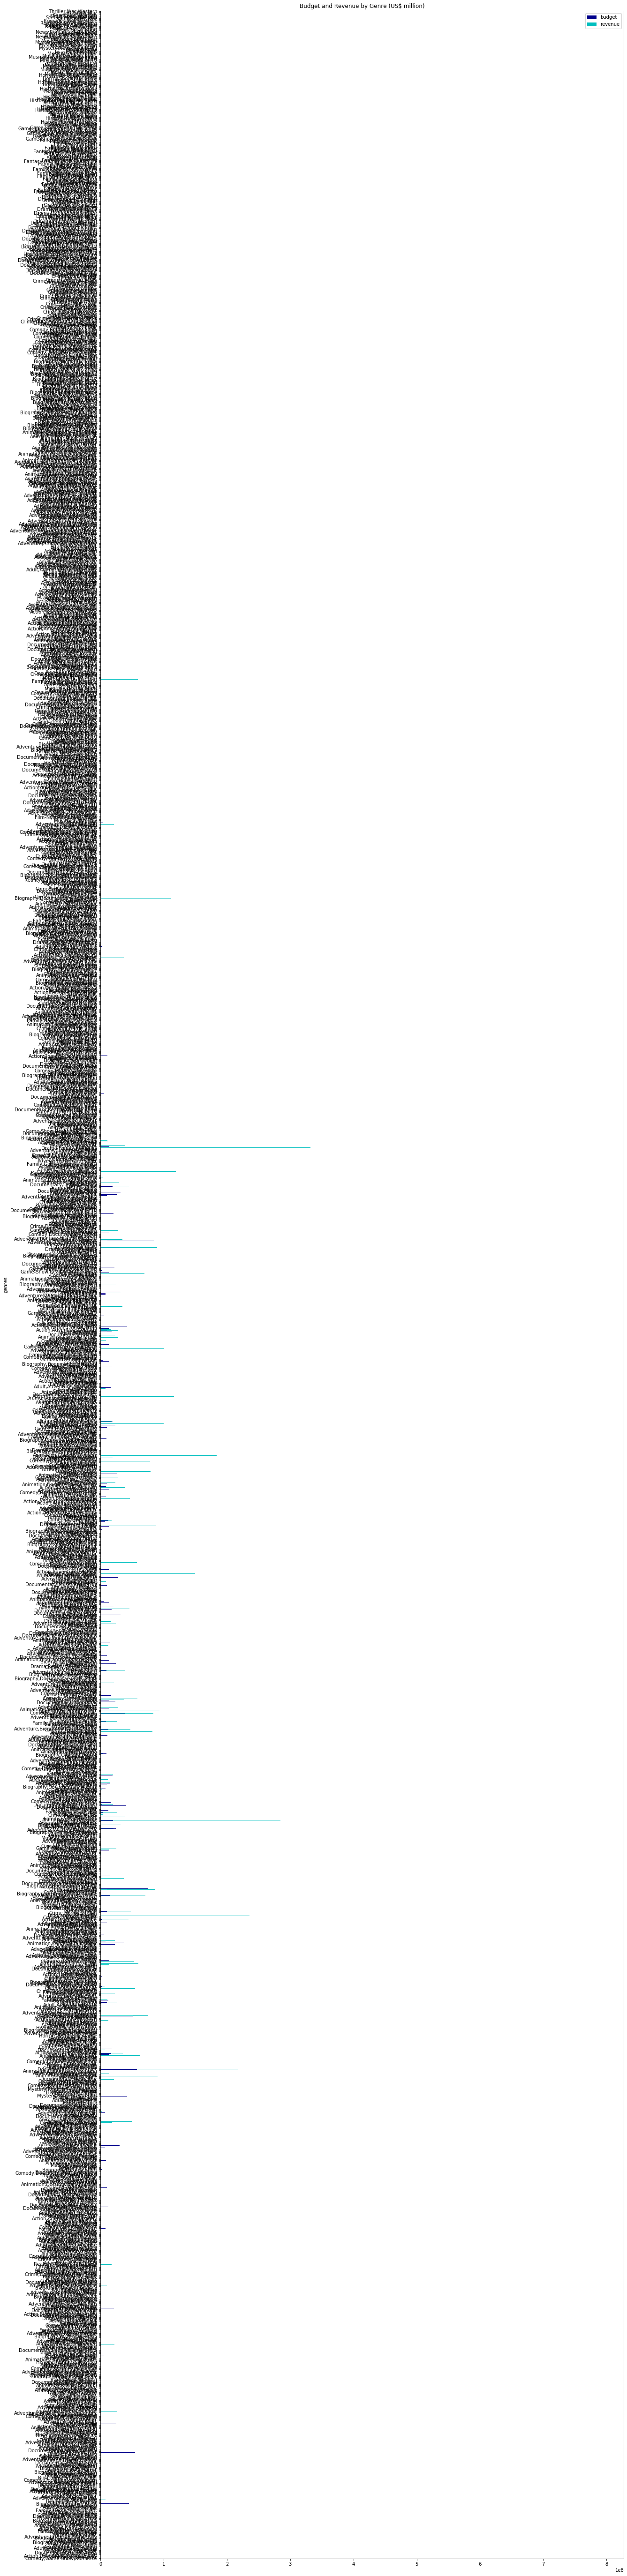

In [103]:
md_genre_mean[['budget','revenue']].plot.barh(stacked=False, title = 'Budget and Revenue by Genre (US$ million)'
             ,color=('DarkBlue','c'), figsize=(20, 100))


In [99]:
# Q3. Which genres have high avg. profit

md_genre_mean.sort_values('profit', ascending=True, inplace = True )

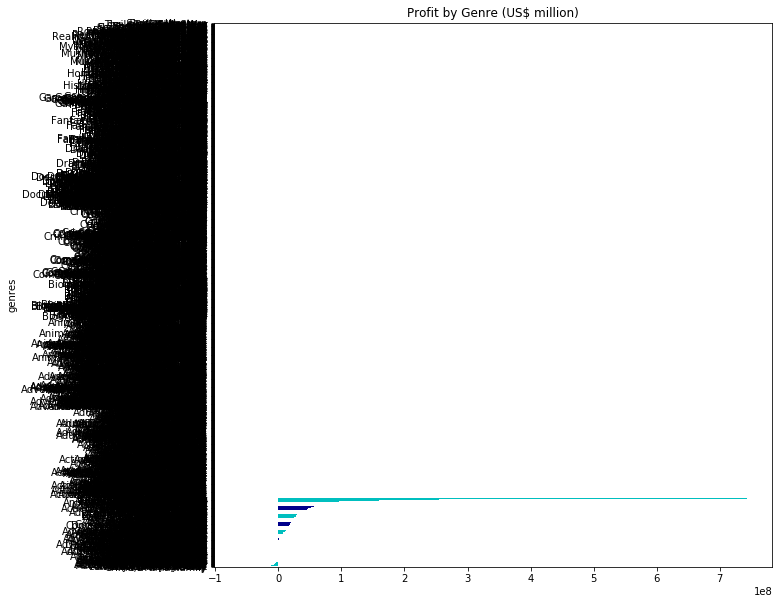

In [100]:
md_genre_mean['profit'].plot.barh(title = 'Profit by Genre'
             , color=('DarkBlue','c'),figsize=(10, 10))


In [ ]:
# Negative value here indicates the loss

In [102]:
#Q4. Which genres have high average rating?

md_genre_mean.sort_values('averageRating', ascending=True, inplace = True )

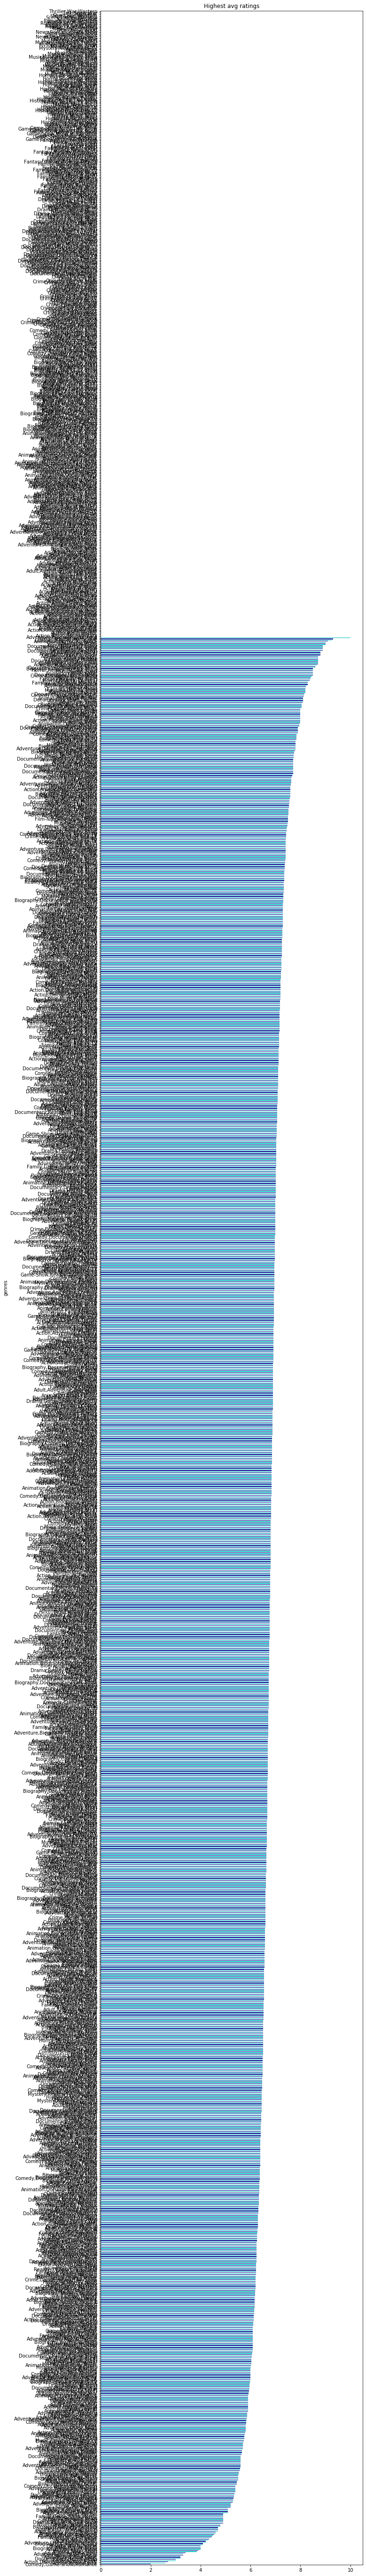

In [104]:
md_genre_mean['averageRating'].plot.barh(title = 'Highest avg ratings'
             , color=('DarkBlue','c'),figsize=(10, 100))

In [105]:
# Q5. Which genres have high avg. popularity?
md_genre_mean.sort_values('popularity' , ascending = True , inplace = True)

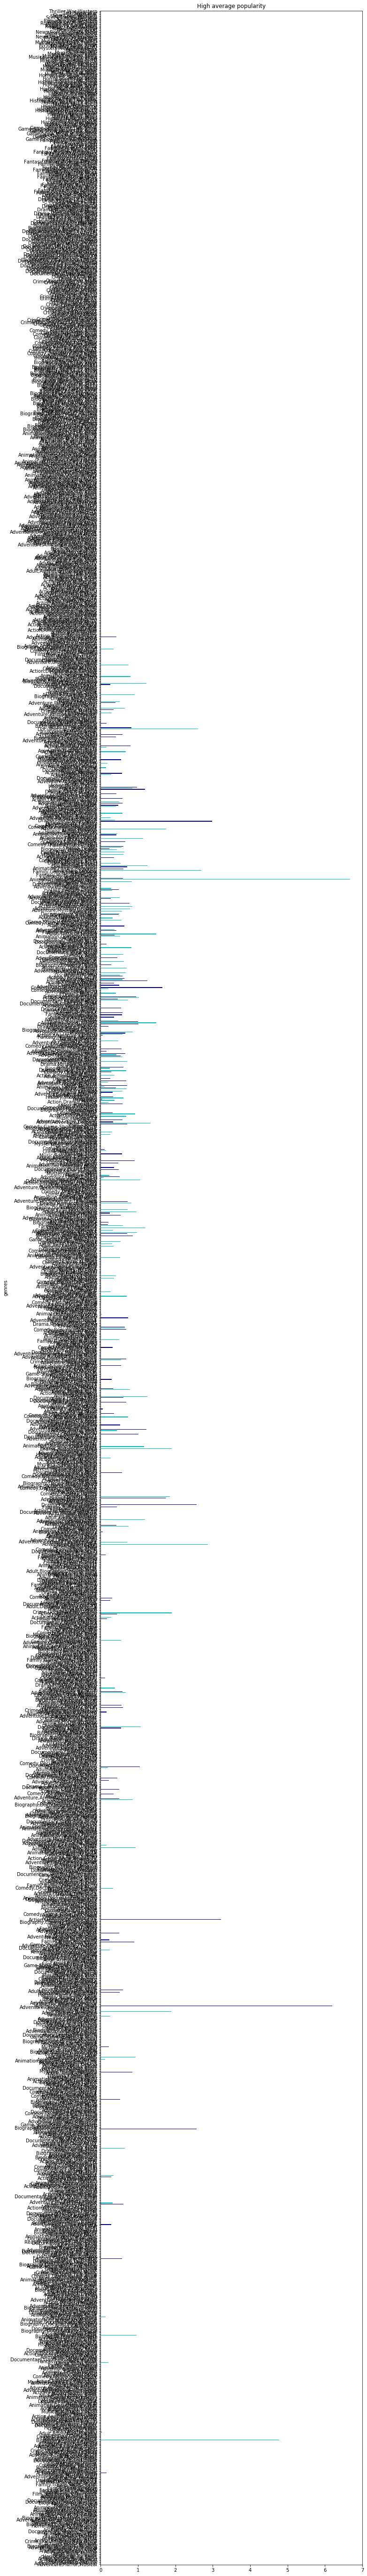

In [112]:
md_genre_mean['popularity'].plot.barh(title= 'High average popularity', 
             color =('DarkBlue','c') , figsize=(10,100))

In [ ]:
# Zoom in figure if not visible properly, As data is in  millions so figure will not fit properly.

In [107]:
# Q6. Which genres have high number of count?
md_genre_mean.sort_values('numVotes', ascending =True , inplace = True)

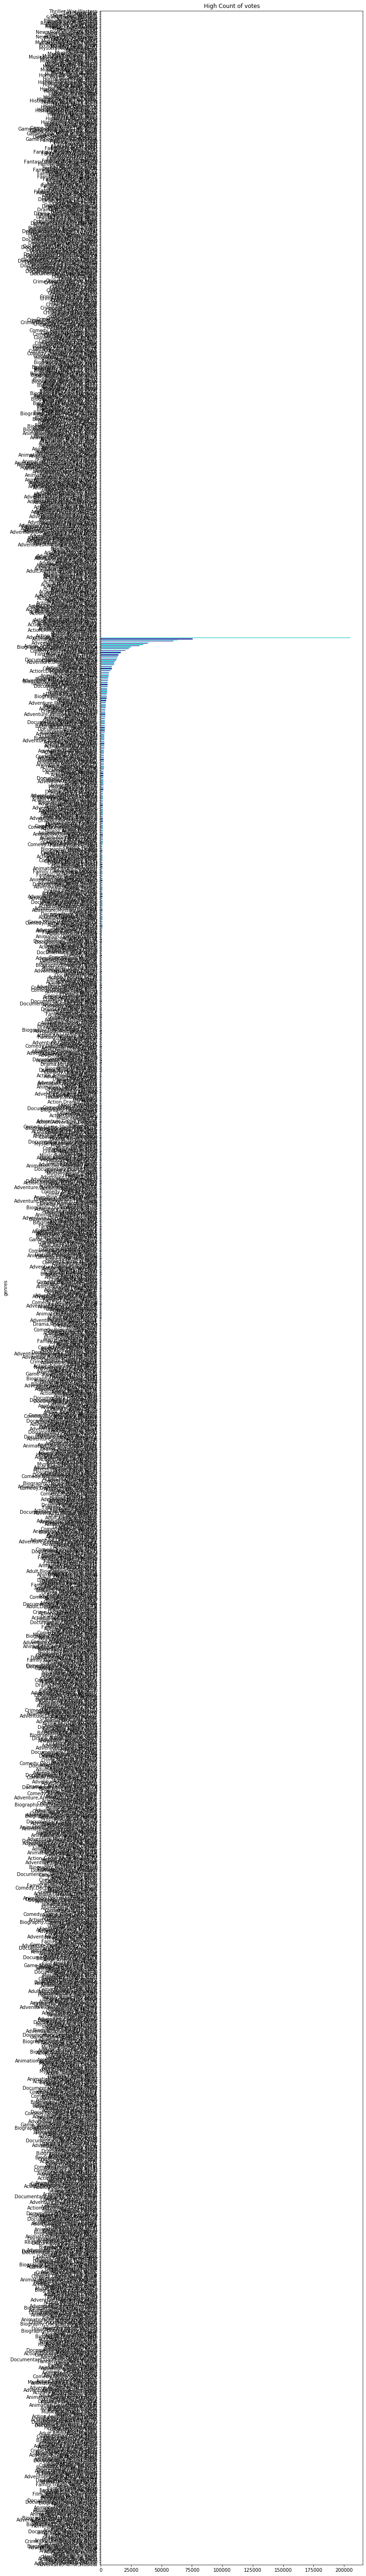

In [113]:
md_genre_mean['numVotes'].plot.barh(title = 'High Count of votes' , 
             color = ('darkBlue','c'), figsize=(10,100))

In [109]:
###### Analysis of variables per genre over the years

In [110]:
md_year_analysis = pd.DataFrame(md.groupby(['startYear','genres'])['revenue','profit',
                                'popularity','numVotes'].mean())

In [111]:
md_year_analysis.head(100)

revenue        profit  popularity  \
startYear genres                                                             
1892      Animation,Comedy,Romance  2.952382e+08  1.852382e+08   13.112507   
          Animation,Short           1.223307e+09  1.048307e+09   19.796520   
1893      Comedy,Short              1.506249e+09  1.316249e+09    9.335014   
1894      Animation,Short           1.405036e+09  1.125036e+09    5.944927   
          Documentary,Short         1.054455e+09  9.254546e+08   20.326581   
...                                          ...           ...         ...   
1902      Action,Adventure,Comedy   0.000000e+00  0.000000e+00    0.250866   
          Comedy,Fantasy,Horror     0.000000e+00  0.000000e+00    0.097514   
          Comedy,Short              0.000000e+00 -2.100000e+06    0.284177   
          Documentary,Short         1.210675e+06 -3.932525e+04    0.290309   
          Drama,Short               0.000000e+00  0.000000e+00    0.252526   

                                       numVotes  
startYear genres                                 
1892      Animation,Comedy,Romance   189.000000  
          Animation,Short                   NaN  
1893      Comedy,Short              1239.000000  
1894      Animation,Short           5640.000000  
          Documentary,Short         1576.000000  
...                                         ...  
1902      Action,Adventure,Comedy      6.000000  
          Comedy,Fantasy,Horror             NaN  
          Comedy,Short                78.833333  
          Documentary,Short           21.333333  
          Drama,Short                 40.000000  

[100 rows x 4 columns]

In [114]:
# Budget per genre per year

md_budget_analysis = pd.DataFrame(md.groupby(['budget','genres'])['revenue','profit',
                                'popularity','numVotes'].mean())

In [130]:
md_budget_analysis.head()

revenue        profit  popularity  \
budget genres                                                               
0.0    Action                      0.000000e+00  0.000000e+00    0.264932   
       Action,Adventure            4.477244e+06  4.477244e+06    0.200745   
       Action,Adventure,Biography  1.532930e+06  1.532930e+06    0.289745   
       Action,Adventure,Comedy     6.208343e+06  6.208343e+06    0.221345   
       Action,Adventure,Crime      3.445827e+06  3.445827e+06    0.408848   

                                   numVotes  
budget genres                                
0.0    Action                         276.5  
       Action,Adventure                37.5  
       Action,Adventure,Biography     534.5  
       Action,Adventure,Comedy          6.5  
       Action,Adventure,Crime          11.0

In [131]:
# Avg.rating per genre
md_rating_analysis = pd.DataFrame(md.groupby(['averageRating','genres'])['numVotes'].mean())

In [133]:
md_rating_analysis.head(200)

numVotes
averageRating genres                               
1.0           Action                      24.250000
              Action,Adventure,Animation  22.166667
              Action,Animation,Comedy      5.000000
              Action,Animation,Fantasy    30.000000
              Action,Crime                 7.000000
...                                             ...
1.1           Crime                       13.500000
              Crime,Drama                 93.000000
              Crime,Drama,Mystery         41.800000
              Crime,Horror,Mystery        43.000000
              Crime,Reality-TV            20.000000

[200 rows x 1 columns]

In [134]:
#################### Research Hypotheses 
# Avg rating Vs Profit will find out correletaion
md.corr(method = 'pearson')

averageRating  numVotes  popularity    budget   revenue  \
averageRating       1.000000  0.013576   -0.030077 -0.013679 -0.003411   
numVotes            0.013576  1.000000    0.000955  0.001892  0.005579   
popularity         -0.030077  0.000955    1.000000  0.545310  0.663293   
budget             -0.013679  0.001892    0.545310  1.000000  0.734858   
revenue            -0.003411  0.005579    0.663293  0.734858  1.000000   
profit              0.000423  0.006165    0.628959  0.570145  0.976164   

                 profit  
averageRating  0.000423  
numVotes       0.006165  
popularity     0.628959  
budget         0.570145  
revenue        0.976164  
profit         1.000000

In [ ]:
# As we can see strong relationship between popularity with revenue (budget|profit), the popular movies earns more rather than 
# movies which got high number of votes.

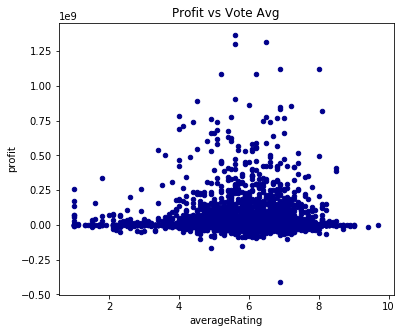

In [135]:
# Scatter plot visualizatoin of correlation
md.plot.scatter(x='averageRating', y='profit',title='Profit vs Vote Avg'
                ,color='DarkBlue',figsize=(6,5))


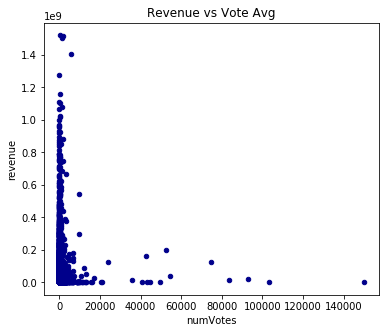

In [138]:
md.plot.scatter(x='numVotes', y='revenue',title='Revenue vs Vote Avg',color='DarkBlue',figsize=(6,5))

In [139]:
# Here, we see that there is no clear negative linear relationship since a lot of movies have a high number of votes 
#,earns very less profit and revenue & lowest votes get highest profit and revenue . Both scatterplots are similar since profit 
# is derived from Popularity of movies.

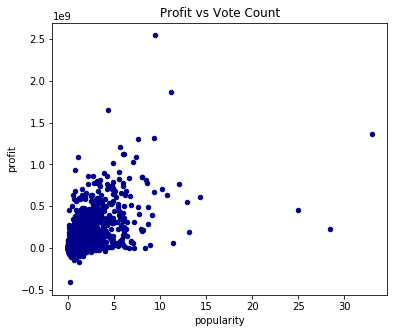

In [148]:
# Additonal FInding
# However, the strongest linear relationship is evident b/w popularity with revenue (budget|profit) vote count ~0.663293 and ~0.628959, respectievly. 
# It turns out that there is a strong linear relationship b/w  popularity with revenue (budget|profit) 
# Movies with a high popularity seem to return high profit and revenue.

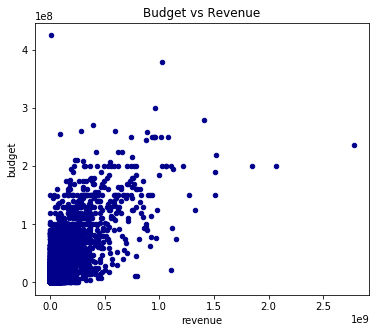

In [145]:
# H3. Highly budgeted movies return high revenue and profit.
md.plot.scatter(x='revenue', y='budget',title='Budget vs Revenue', color='DarkBlue', figsize=(6,5))

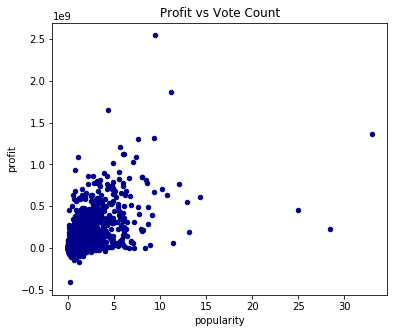

In [150]:
md.plot.scatter(x='popularity', y='profit',title='Profit vs Vote Count', color='DarkBlue', figsize=(6,5))

In [ ]:
# Conclusion
# Maximum movies produce for "Action" genre
# If you want profit you should go for Adventure, Action or Animation (Top 3 in terms of profit) & so on.

# Hypotheses
# Movies with a high avg. voting do not necessarily bring in high profits and revenues.
# However, movies with a high popularity seem to bring in on avg. more profit and revenue.
# Higly budgeted movies return in general higher revenue, but not necessarily high profit (moderate linear relationship)
# Only because a movie has a high budget, does not mean that it becomes a great movie with a very high avg. rating.

# The hypothesis questions were analyzed using the correlation coefficient. 
# They all assume values in the range from −1 to +1, where +1 indicates the strongest possible agreement 
# and −1 the strongest possible disagreement, in terms of linear relationship
# herefore, these relations are merely correlations and do not imply causation. 